In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models, callbacks


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(f"Training set: {x_train.shape},  Test set: {x_test.shape}")

Training set: (60000, 28, 28),  Test set: (10000, 28, 28)


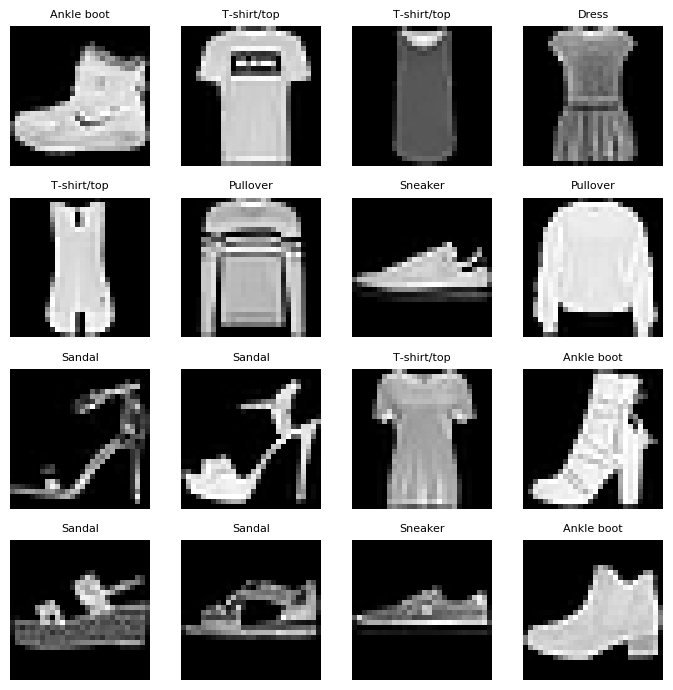

In [5]:
class_names = ["T‑shirt/top","Trouser","Pullover","Dress","Coat",
               "Sandal","Shirt","Sneaker","Bag","Ankle boot"]

plt.figure(figsize=(7,7))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]], fontsize=8)
    plt.axis('off')
plt.tight_layout(); plt.show()


In [7]:
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0


In [9]:
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test,  -1)


In [11]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat  = to_categorical(y_test, 10)


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train_cat, y_val_cat = train_test_split(
    x_train, y_train_cat, test_size=0.1, random_state=42)
print(f"Train: {x_train.shape},  Val: {x_val.shape}")


Train: (54000, 28, 28, 1),  Val: (6000, 28, 28, 1)


In [15]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28,28,1)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10,  activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


C:\Users\SURABHI\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tb_cb   = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
es_cb   = callbacks.EarlyStopping(patience=5, restore_best_weights=True)


In [19]:
history = model.fit(
    x_train, y_train_cat,
    epochs=30,
    batch_size=256,
    validation_data=(x_val, y_val_cat),
    callbacks=[tb_cb, es_cb]
)


Epoch 1/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.7295 - loss: 0.7600 - val_accuracy: 0.8623 - val_loss: 0.3875
Epoch 2/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.8604 - loss: 0.3863 - val_accuracy: 0.8665 - val_loss: 0.3662
Epoch 3/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.8753 - loss: 0.3367 - val_accuracy: 0.8703 - val_loss: 0.3609
Epoch 4/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.8904 - loss: 0.2960 - val_accuracy: 0.8807 - val_loss: 0.3414
Epoch 5/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.8947 - loss: 0.2826 - val_accuracy: 0.8848 - val_loss: 0.3192
Epoch 6/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9000 - loss: 0.2688 - val_accuracy: 0.8853 - val_loss: 0.3206
Epoch 7/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9056 - loss: 0.2507 - val_accuracy: 0.8848 - val_loss: 0.3290
Epoch 8/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9112 - loss: 0.2374 - val_acc

In [23]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"✅  Test accuracy: {test_acc:.4f} | Test loss: {test_loss:.4f}")



✅  Test accuracy: 0.8867 | Test loss: 0.3205


In [25]:
model.save("fashion_mnist_dense.h5")


In [29]:
loaded = keras.models.load_model("fashion_mnist_dense.h5")
loaded.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,436 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [31]:
print("Same param count?", loaded.count_params() == model.count_params())


Same param count? True


In [33]:
sample = x_test[:64]
pred_orig   = model.predict(sample)
pred_loaded = loaded.predict(sample)
print("Predictions identical? ", np.allclose(pred_orig, pred_loaded, atol=1e-6))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step 
Predictions identical?  True
